In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.chdir('drive/MyDrive/AI+X선도인재양성프로젝트/003.지하철 이용승객 EDA분석_숙제_20220914/실습')
%load_ext autoreload
%autoreload 2

In [ ]:
!ls

'1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb'
'2호선 역 승차 빈도(합계).html'
'AI+X기초프로젝트_실습(김정우, 총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 평균으로 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 합계로 구함).ipynb'
'AI+X연습(총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(평균으로 그래프 구함).ipynb'
 rawfiles
 rawfiles.zip
 subway_raw.csv
'subway_raw 데이터 전처리.ipynb'


In [ ]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 10.0


##subway_raw 데이터 전처리

In [ ]:
raw_df = pd.read_csv('rawfiles/CARD_SUBWAY_MONTH_201901.csv')
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [ ]:
raw_df = pd.DataFrame()
for month in range(1, 7):
    temp_df = pd.read_csv(f'rawfiles/CARD_SUBWAY_MONTH_20190{month}.csv')
    raw_df = pd.concat([raw_df, temp_df], axis=0)

raw_df = raw_df.reset_index(drop=True)
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
107023,20190630,7호선,마들,6622.0,6116.0,20190703
107024,20190630,4호선,노원,14071.0,14702.0,20190703
107025,20190630,7호선,중계,9516.0,8981.0,20190703
107026,20190630,7호선,하계,11645.0,11121.0,20190703


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [ ]:
raw_df['사용일자'] = pd.to_datetime(raw_df['사용일자'], format='%Y%m%d')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [ ]:
raw_df['요일'] = raw_df['사용일자'].dt.dayofweek
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,1
...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6


In [ ]:
day_of_week = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}
raw_df['요일'] = raw_df['요일'].map(day_of_week)

In [ ]:
raw_df['연월'] = raw_df['사용일자'].dt.strftime('%Y-%m')
raw_df['월일'] = raw_df['사용일자'].dt.strftime('%m-%d')
raw_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,2019-01,01-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,2019-01,01-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,2019-01,01-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,2019-01,01-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,2019-01,01-01


In [ ]:
raw_df['승하차총승객수'] = raw_df['승차총승객수'] + raw_df['하차총승객수']
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [ ]:
raw_df.isna().sum()

,0
사용일자,0
요일,0
노선명,0
역명,0
승차총승객수,0
하차총승객수,0
승하차총승객수,0
연월,0
월일,0
등록일자,0


In [ ]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

27324

In [ ]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='을지로4가')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
394,2019-01-01,화,2호선,을지로4가,1406.0,1867.0,3273.0,2019-01,01-01,20190104


In [ ]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
108,2019-01-01,화,4호선,서울역,5689.0,13266.0,18955.0,2019-01,01-01,20190104
117,2019-01-01,화,4호선,서울역,5983.0,731.0,6714.0,2019-01,01-01,20190104
295,2019-01-01,화,4호선,서울역,39420.0,31121.0,70541.0,2019-01,01-01,20190104
300,2019-01-01,화,4호선,서울역,1278.0,919.0,2197.0,2019-01,01-01,20190104
552,2019-01-01,화,4호선,서울역,14043.0,9955.0,23998.0,2019-01,01-01,20190104


In [ ]:
raw_df = raw_df.groupby(['사용일자', '요일','노선명','역명','연월','월일', '등록일자']).sum().reset_index()

In [ ]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

0

In [ ]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,연월,월일,등록일자,승차총승객수,하차총승객수,승하차총승객수
199,2019-01-01,화,4호선,서울역,2019-01,01-01,20190104,66413.0,55992.0,122405.0


In [ ]:
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일']]
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   사용일자     92129 non-null  datetime64[ns]
 1   요일       92129 non-null  object        
 2   노선명      92129 non-null  object        
 3   역명       92129 non-null  object        
 4   승차총승객수   92129 non-null  float64       
 5   하차총승객수   92129 non-null  float64       
 6   승하차총승객수  92129 non-null  float64       
 7   연월       92129 non-null  object        
 8   월일       92129 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.3+ MB


In [ ]:
raw_df.describe()

,사용일자,승차총승객수,하차총승객수,승하차총승객수
count,92129,92129.000000,92129.000000,92129.000000
mean,2019-04-01 00:00:00,14618.749427,14559.237580,29177.987007
min,2019-01-01 00:00:00,16.000000,16.000000,38.000000
25%,2019-02-15 00:00:00,4417.000000,4205.000000,8637.000000
50%,2019-04-01 00:00:00,9543.000000,9280.000000,18870.000000
75%,2019-05-16 00:00:00,18712.000000,18576.000000,37359.000000
max,2019-06-30 00:00:00,143774.000000,167980.000000,311754.000000
std,NaN,16167.904767,16527.224179,32672.526322


In [ ]:
raw_df.describe(include='object')

,요일,노선명,역명,연월,월일
count,92129,92129,92129,92129,92129
unique,7,19,509,6,181
top,화,1호선,가능,2019-01,01-01
freq,13234,16109,181,15779,509


In [ ]:
df = raw_df.copy()

In [ ]:
!pip install scikit-posthocs # 사후검정을 위해 설치 필요.

##2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)

In [ ]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 탐지
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # 이상치를 각 그룹의 평균값으로 대체
    mean_value = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)].mean()
    df.loc[outliers, column] = mean_value

    return df

In [ ]:
passengers_of_day = df[['사용일자','승하차총승객수']].copy()
passengers_of_day['사용일자'] = passengers_of_day['사용일자'].astype(str)
passengers_of_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사용일자     92129 non-null  object 
 1   승하차총승객수  92129 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
for date, group in passengers_of_day.groupby('사용일자'):
    passengers_of_day.loc[passengers_of_day['사용일자'] == date, '승하차총승객수'] = replace_outliers_with_mean(group, '승하차총승객수')['승하차총승객수']

In [ ]:
# 이상치->평균 변환 전
test1 = df[df['사용일자']=='2019-01-01']['승하차총승객수']

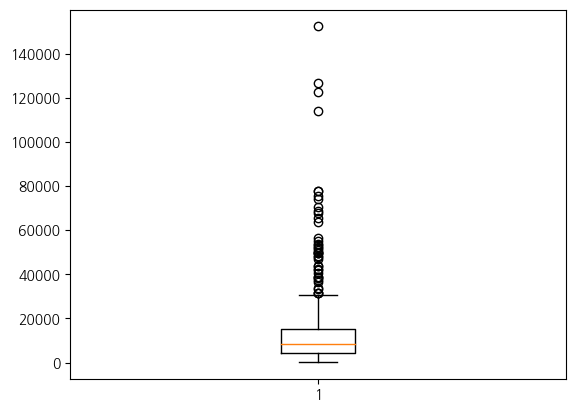

In [ ]:
plt.boxplot(test1)
plt.show()

In [ ]:
print(test1.min(), test1.max(), test1.mean())

48.0 152276.0 13385.958742632612


In [ ]:
# 이상치->평균 변환 후
test2 = passengers_of_day[passengers_of_day['사용일자']=='2019-01-01']['승하차총승객수']
print(test2.min(), test2.max(), test2.mean())

48.0 30396.0 9371.991434689508


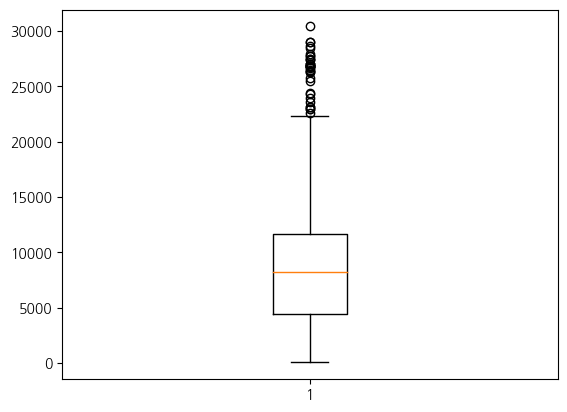

In [ ]:
plt.boxplot(test2)
plt.show()

In [ ]:
# pd.options.display.float_format = '{:.f}'.format # pandas는 큰 숫자를 지수 표기법(exponential notation)으로 출력할 때가 있음. 이를 방지하기 위한 코드.
passengers_of_day = passengers_of_day.groupby(['사용일자'])['승하차총승객수'].sum()  # 각각의 '사용일자'별로 '승하차총승객수'의 합을 구함.
passengers_of_day.head()

,승하차총승객수
사용일자,
2019-01-01,4.770344e+06
2019-01-02,1.156346e+07
2019-01-03,1.179169e+07
2019-01-04,1.215924e+07
2019-01-05,8.597159e+06


In [ ]:
passengers_of_day = passengers_of_day.sort_values(ascending=False)
passengers_of_day

,승하차총승객수
사용일자,
2019-05-10,1.400302e+07
2019-04-11,1.378114e+07
2019-05-15,1.377735e+07
2019-05-24,1.373854e+07
2019-05-28,1.367714e+07
...,...
2019-02-06,5.253228e+06
2019-02-03,4.910318e+06
2019-01-01,4.770344e+06


In [ ]:
passengers_of_day_top10 = passengers_of_day[:10]
passengers_of_day_top10

,승하차총승객수
사용일자,
2019-05-10,1.400302e+07
2019-04-11,1.378114e+07
2019-05-15,1.377735e+07
2019-05-24,1.373854e+07
2019-05-28,1.367714e+07
2019-05-03,1.366353e+07
2019-05-09,1.365483e+07
2019-05-17,1.365049e+07
2019-05-08,1.362890e+07


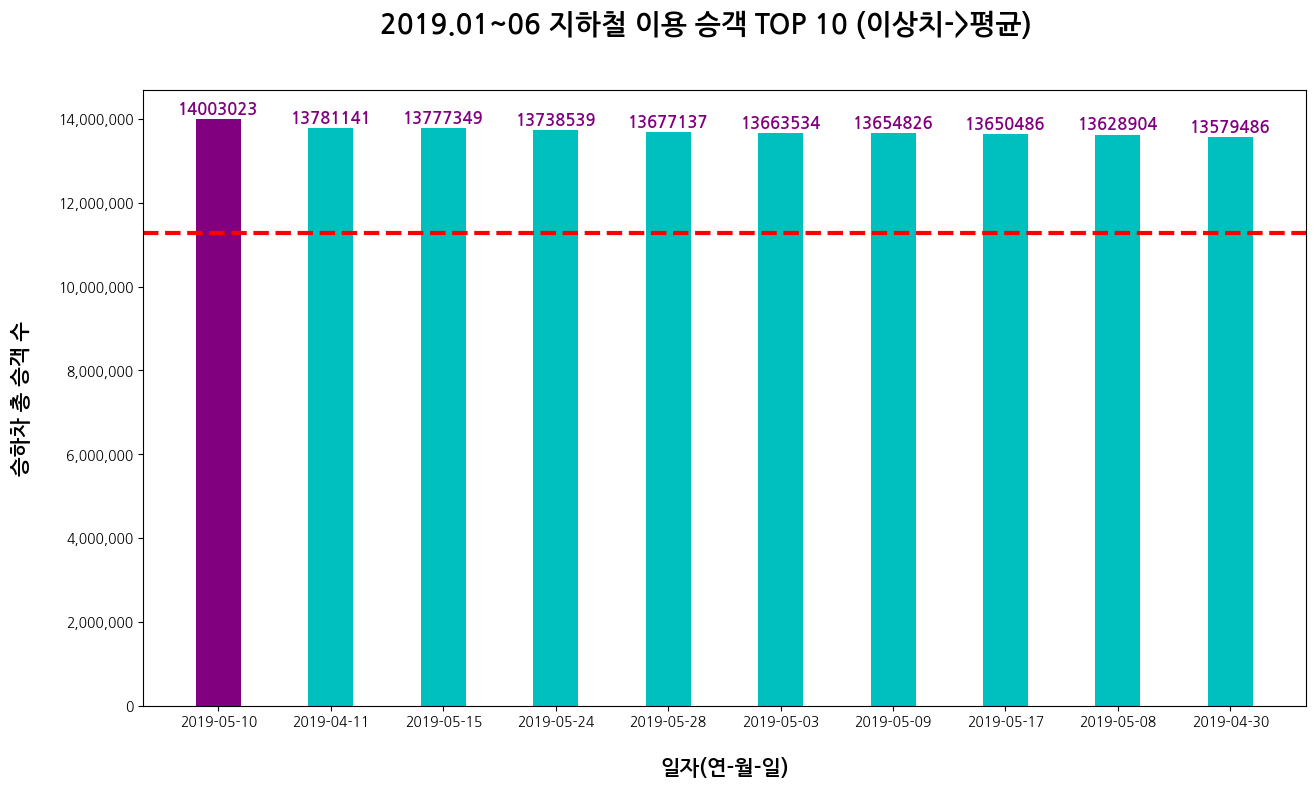

In [ ]:
# 기존 숫자의 스케일을 유지하기 위한 모듈 import
import matplotlib.ticker as mtick

# 그래프 색깔을 리스트로 만듬. 최대값은 보라색으로 표현.
color = ['purple','c','c','c','c','c','c','c','c','c']

# fig는 그림 객체, ax는 하위 그래프 객체. figsize는 전체 그림판의 크기(그림판 안에 하위 그래프가 그려짐).
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(passengers_of_day_top10.index, passengers_of_day_top10.values, width=0.4, color=color)  # 막대그래프. 매개변수: (x축, y축, 그래프 폭, 색깔),  x축에 '사용일자'(index)를, y축에 '승하차총승객수(values)'를 놓음.

plt.axhline(y=passengers_of_day.mean().round(), color='r', linestyle='--', linewidth=3) # 평균을 점선으로 그림

# 막대 그래프 위의 주석을 표시하기 위한 for문. 첫번째 매개변수는 주석에 표시할 값, 두번째는 그 주석을 놓을 위치. 자세한 내용은 gpt 참조.
for idx, val in passengers_of_day_top10.items():
        plt.annotate(round(val), (idx, val), xytext=(0,4), textcoords='offset points', ha='center', color='purple', fontsize=12, fontweight='bold')

# # 기존 숫자의 단위를 유지하기 위해 작성한 코드. {int(x):,}에서 ','는 천 단위마다 컴마를 추가 하기 위함.
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# x,y축 이름과 그래프 이름.
fig.suptitle('2019.01~06 지하철 이용 승객 TOP 10 (이상치->평균)', fontsize=20, fontweight='bold')
ax.set_xlabel('일자(연-월-일)', fontsize=15, fontweight='bold', labelpad=20)  # labelpad는 그래프와 축 이름의 간격을 설정하는 매개변수.
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [ ]:
passengers_of_day.idxmax()

'2019-05-10'

In [ ]:
# TOP10에서 사용일자별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(passengers_of_day_top10.index)
test_df =  df[df['사용일자'].astype(str).isin(date_list)].copy()

# 사용일자별로 승객 수가 유의미한 차이가 있는가.
grouped = test_df.groupby('사용일자')

# 사용일자별로 D'Agostino's K-squared 검정을 수행
for date, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"사용일자: {date} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{date}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{date}: 데이터는 정규분포를 따릅니다.")

사용일자: 2019-04-11 00:00:00 - D’Agostino’s K-squared Test Statistic: 274.82218942075, p-value: 2.1043589191316934e-60
2019-04-11 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-04-30 00:00:00 - D’Agostino’s K-squared Test Statistic: 263.83500483910035, p-value: 5.116307431661135e-58
2019-04-30 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-05-03 00:00:00 - D’Agostino’s K-squared Test Statistic: 311.19005652486743, p-value: 2.6664768284899796e-68
2019-05-03 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-05-08 00:00:00 - D’Agostino’s K-squared Test Statistic: 244.7630516944287, p-value: 7.085632728113922e-54
2019-05-08 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-05-09 00:00:00 - D’Agostino’s K-squared Test Statistic: 251.5953587151963, p-value: 2.32681587818365e-55
2019-05-09 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-05-10 00:00:00 - D’Agostino’s K-squared Test Statistic: 287.50369805218196, p-value: 3.709925637188319e-63
2019-05-10 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2019-05-15 00:00:00 - D’Agostino’s K-s

In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 사용일자별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['사용일자'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='사용일자', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 소수점 4째자리까지 표현(반올림 포함). 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 1.4570250524317838, p-value: 0.9974531998315024
유의미한 차이가 없습니다.


##1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [ ]:
def outlier_to_mean(df, month):
    sub_df = df[df['연월']==f'2019-0{month}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df.loc[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
passengers_of_month = df[['연월', '승하차총승객수']].copy()
for i in range(1,7):
    passengers_of_month.loc[passengers_of_month['연월']==f'2019-0{i}','승하차총승객수'] = outlier_to_mean(passengers_of_month, i)

In [ ]:
passengers_of_month = passengers_of_month.groupby(['연월'])['승하차총승객수'].sum()
passengers_of_month

,승하차총승객수
연월,
2019-01,3.253208e+08
2019-02,2.756807e+08
2019-03,3.546834e+08
2019-04,3.608140e+08
2019-05,3.739152e+08
2019-06,3.353372e+08


In [ ]:
passengers_of_month.idxmax()

'2019-05'

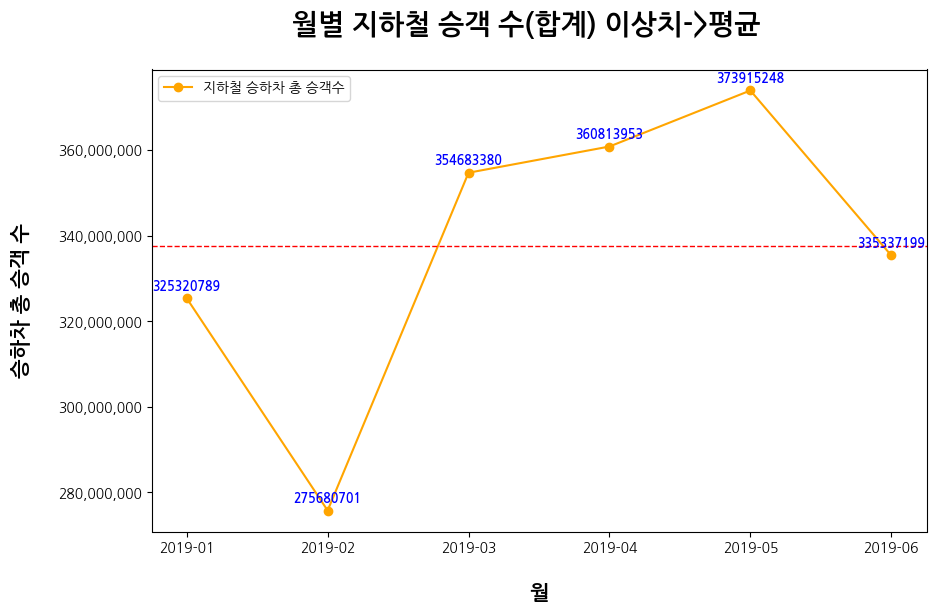

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(passengers_of_month, marker='o', c='orange', label='지하철 승하차 총 승객수') # 선(plot) 그래프. 첫번째 매개변수로 시리즈 객체 넣어줌(여기서는 passengers_of_month)
                                                                                   # marker는 데이터 값마다 o표시. c는 그래프 색깔, label은 범례 안에 들어갈 이 그래프의 이름.

plt.axhline(y=passengers_of_month.mean().round(), color='r', linestyle='--', linewidth=1) # 평균을 점선으로 그림

# 그래프 위에 주석 추가
for idx, val in passengers_of_month.items():
    ax.annotate(round(val), (idx, val+100000), xytext=(0, 6), textcoords='offset points', ha='center',
                fontsize=9, fontweight='bold', color='blue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
ax.legend(loc='upper left') # 범례 추가

# x,y축 이름과 그래프 이름.
fig.suptitle('월별 지하철 승객 수(합계) 이상치->평균', fontsize=20, fontweight='bold')
ax.set_xlabel('월', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [ ]:
# 월별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
test_df = df.copy()

# '승하차총승객수'에 대한 정규성 검정을 월별로 수행
grouped = test_df.groupby('연월')

# 월별로 D'Agostino's K-squared 검정을 수행
for month, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"월: {month} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{month}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{month}: 데이터는 정규분포를 따릅니다.")

월: 2019-01 - D’Agostino’s K-squared Test Statistic: 9179.835199879604, p-value: 0.0
2019-01: 데이터는 정규분포를 따르지 않습니다.
월: 2019-02 - D’Agostino’s K-squared Test Statistic: 8841.195919415699, p-value: 0.0
2019-02: 데이터는 정규분포를 따르지 않습니다.
월: 2019-03 - D’Agostino’s K-squared Test Statistic: 8686.009433612518, p-value: 0.0
2019-03: 데이터는 정규분포를 따르지 않습니다.
월: 2019-04 - D’Agostino’s K-squared Test Statistic: 8384.944346394881, p-value: 0.0
2019-04: 데이터는 정규분포를 따르지 않습니다.
월: 2019-05 - D’Agostino’s K-squared Test Statistic: 8795.000157974913, p-value: 0.0
2019-05: 데이터는 정규분포를 따르지 않습니다.
월: 2019-06 - D’Agostino’s K-squared Test Statistic: 8612.407171301207, p-value: 0.0
2019-06: 데이터는 정규분포를 따르지 않습니다.


In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 월별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['연월'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='연월', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 429.54257986874, p-value: 1.2687372475531915e-90
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
         2019-01  2019-02  2019-03  2019-04  2019-05  2019-06
2019-01      1.0      0.0      0.0      0.0      0.0      0.0
2019-02      0.0      1.0      0.0      0.0      0.0      0.0
2019-03      0.0      0.0      1.0      0.0      0.0      1.0
2019-04      0.0      0.0      0.0      1.0      1.0      0.0
2019-05      0.0      0.0      0.0      1.0      1.0      0.0
2019-06      0.0      0.0      1.0      0.0      0.0      1.0


결과: 3월과 6월의 승하차총승객수는 유의미한 차이가 없다. 4월과 5월의 승하차총승객수는 유의미한 차이가 없다.

##요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
def outlier_to_mean(df, day):
    sub_df = df[df['요일']==f'{day}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean().round()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
df_week = df[['요일', '승하차총승객수']]
days = ['월', '화', '수', '목', '금', '토', '일']
for day in days:
    df_week.loc[df_week['요일']==f'{day}','승하차총승객수'] = outlier_to_mean(df_week, day)

In [ ]:
df_week = df_week.groupby(['요일'])['승하차총승객수'].sum()
df_week = df_week.reindex(['월', '화', '수', '목', '금', '토', '일'])
df_week

,승하차총승객수
요일,
월,302943704.0
화,319969029.0
수,326090717.0
목,329357376.0
금,334905480.0
토,246636048.0
일,182699797.0


In [ ]:
print(f"가장 많은 승객들이 지하철을 이용하는 요일: {df_week.idxmax()}(이용승객 수: {int(df_week.max())})")

가장 많은 승객들이 지하철을 이용하는 요일: 금(이용승객 수: 334905480)


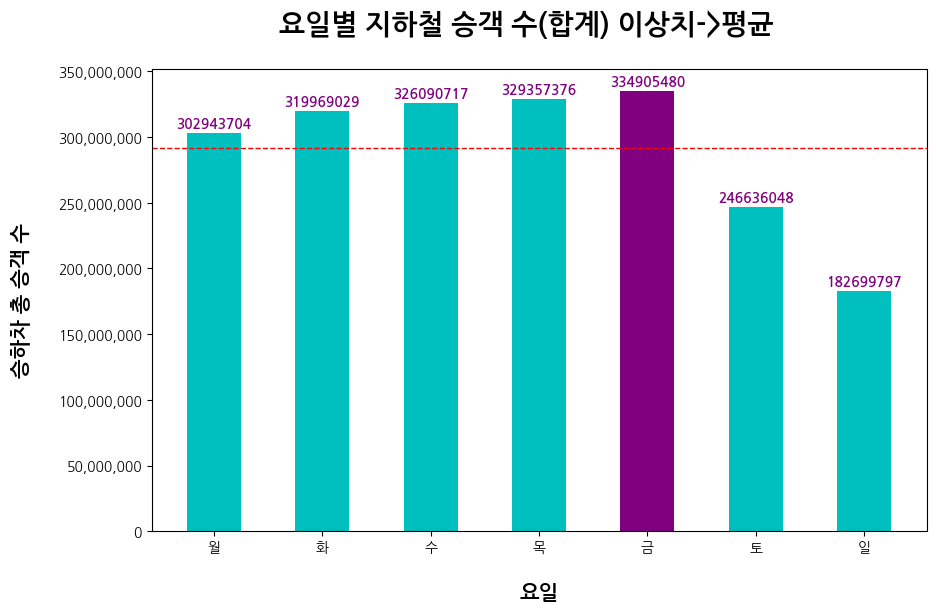

In [ ]:
colors = ['c','c','c','c','purple','c','c'] # 그래프 색상 리스트

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_week.index, df_week.values, color=colors, width=0.5) # 막대 그래프. x축: '요일'   y축: '승하차총승객수'

plt.axhline(y=df_week.mean().round(), color='r', linestyle='--', linewidth=1) # 평균을 점선으로 그림

# 막대 그래프 위에 주석 추가.
for idx, val in df_week.items():
    plt.annotate(round(val), (idx, val), xytext=(0,4),
                 textcoords='offset points', ha='center', color='purple',fontsize=10, fontweight='bold')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

fig.suptitle('요일별 지하철 승객 수(합계) 이상치->평균', fontsize=20, fontweight='bold')
ax.set_xlabel('요일', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [ ]:
# 요일별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
test_df = df.copy()

# '승하차총승객수'에 대한 정규성 검정을 월별로 수행
grouped = test_df.groupby('요일')
# 요일별로 D'Agostino's K-squared 검정을 수행
for week, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"요일: {week} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{week}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{week}: 데이터는 정규분포를 따릅니다.")

요일: 금 - D’Agostino’s K-squared Test Statistic: 7233.668587690906, p-value: 0.0
금: 데이터는 정규분포를 따르지 않습니다.
요일: 목 - D’Agostino’s K-squared Test Statistic: 6700.673358256344, p-value: 0.0
목: 데이터는 정규분포를 따르지 않습니다.
요일: 수 - D’Agostino’s K-squared Test Statistic: 6596.01396616169, p-value: 0.0
수: 데이터는 정규분포를 따르지 않습니다.
요일: 월 - D’Agostino’s K-squared Test Statistic: 6397.9416554108375, p-value: 0.0
월: 데이터는 정규분포를 따르지 않습니다.
요일: 일 - D’Agostino’s K-squared Test Statistic: 9905.413010902812, p-value: 0.0
일: 데이터는 정규분포를 따르지 않습니다.
요일: 토 - D’Agostino’s K-squared Test Statistic: 9492.336317633255, p-value: 0.0
토: 데이터는 정규분포를 따르지 않습니다.
요일: 화 - D’Agostino’s K-squared Test Statistic: 6603.463947068241, p-value: 0.0
화: 데이터는 정규분포를 따르지 않습니다.


In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 요일별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['요일'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='요일', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 3038.454425750401, p-value: 0.0
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
        금       목       수       월    일    토       화
금  1.0000  0.7442  0.0063  0.0000  0.0  0.0  0.0000
목  0.7442  1.0000  1.0000  0.0006  0.0  0.0  0.0013
수  0.0063  1.0000  1.0000  0.1429  0.0  0.0  0.2601
월  0.0000  0.0006  0.1429  1.0000  0.0  0.0  1.0000
일  0.0000  0.0000  0.0000  0.0000  1.0  0.0  0.0000
토  0.0000  0.0000  0.0000  0.0000  0.0  1.0  0.0000
화  0.0000  0.0013  0.2601  1.0000  0.0  0.0  1.0000


##일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하차총승객수)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
def outlier_to_mean(df, month_day):
    sub_df = df[df['월일']==f'{month_day}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
df_MD = df[['월일', '승하차총승객수']]
months_days = df_MD['월일'].unique()
for month_day in months_days:
    df_MD.loc[df_MD['월일']==f'{month_day}','승하차총승객수'] = outlier_to_mean(df_MD, month_day)

In [ ]:
df_MD = df_MD.groupby(['월일'])['승하차총승객수'].sum()
df_MD

,승하차총승객수
월일,
01-01,4.770344e+06
01-02,1.156346e+07
01-03,1.179169e+07
01-04,1.215924e+07
01-05,8.597159e+06
...,...
06-26,1.281787e+07
06-27,1.250471e+07
06-28,1.295883e+07


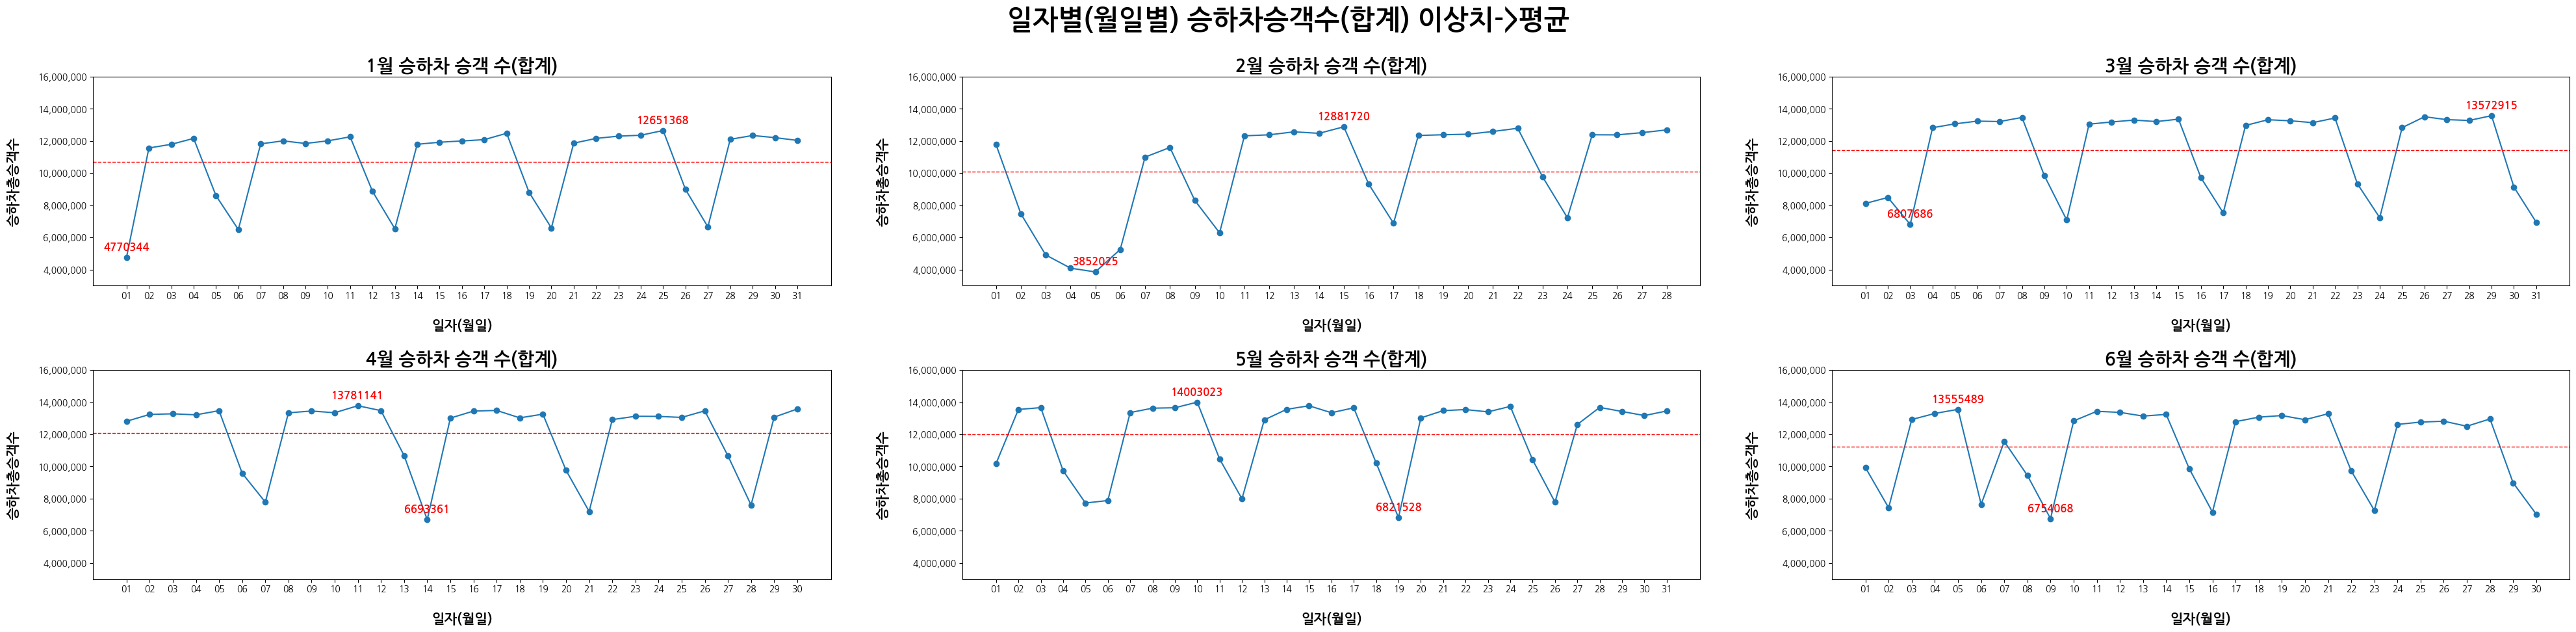

In [ ]:
month = 1 # 1월부터 시작.

fig, axes = plt.subplots(2, 3, figsize=(40, 10)) # 2x3 행렬, figure 객체(그림객체) 크기는 가로40, 세로10.
for r in range(2): # 행(row)
    for c in range(3): # 열(column)

        df_M = df_MD[df_MD.index.str.startswith(f'0{month}')]  # df_MD의 인덱스(월일)가 f'0{month}'로 시작하는 것들만 저장.   ex. month = 1 이면 01로 시작하는 모든 data를 저장(즉, 1월 data만 저장)
        day_list = df_M.index.str.split('-') # '-'를 기준으로 인덱스를 나눔. ex. 01-02 -> ['01', '02'] 이것을 1월의 모든 행에 적용하면 day_list = [['01', '01'], ['01', '02'], .....['01', '31']] 이 생성됨.
        day_list = day_list.str.get(1) # 그중 첫번째 인덱스의 값을 모두 가져옴. -> ['01', '02', ... '31'] <<<이해가 되지 않는다면 아래의 셀의 코드를 실행.>>>
        axes[r,c].plot(day_list, df_M.values, marker='o') # x축은 날짜(일), y축은 '승하차총승객수'
        df_M_max = df_M.max()
        df_M_min = df_M.min()

        axes[r,c].axhline(y=df_M.mean().round(), color='r', linestyle='--', linewidth=1) # 평균을 점선으로 그림

        # 월별로 최대값, 최소값인 지점만 주석 표시.
        for idx, val in zip(day_list[:], df_M[:].values):
            if(val == df_M_max): # 최대값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')
            elif(val == df_M_min): # 최소값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')

        axes[r,c].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
        axes[r,c].set_ylim(3000000, 16000000) # y축의 범위 설정.

        # x,y축 이름 및 각각의 그래프 이름
        axes[r,c].set_xlabel('일자(월일)', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_ylabel('승하차총승객수', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_title(f'{month}월 승하차 승객 수(합계)', fontsize=20, fontweight='bold')

        month += 1 # month 1증가

fig.suptitle('일자별(월일별) 승하차승객수(합계) 이상치->평균', fontsize=30, fontweight='bold')  # 전체 제목.
fig.set_layout_engine('tight', pad=2.0, h_pad=2.0, w_pad=5.0) # 그래프를 좀더 보기 편하게 하기 위한 부가적인 설정. gpt 검색 해봐도 됨.
plt.show()

##가장 승객이 많이 타는 승차역은?

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
def outlier_to_mean(df, station):
    sub_df = df[df['역명']==f'{station}']['승차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
df_stations = df[['역명', '승차총승객수']]
stations = df_stations['역명'].unique()
for station in stations:
    df_stations.loc[df_stations['역명']==f'{station}','승차총승객수'] = outlier_to_mean(df_stations, station)

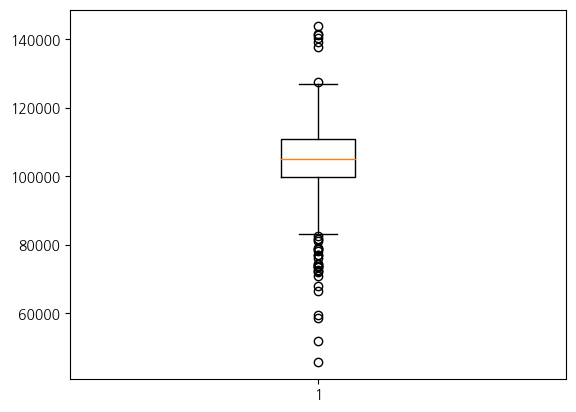

In [ ]:
plt.boxplot(df[df['역명']=='잠실']['승차총승객수'])
plt.show()

In [ ]:
# 이상치 처리 하기 전
print(df[df['역명']=='잠실']['승차총승객수'].min(), df[df['역명']=='잠실']['승차총승객수'].max(), df[df['역명']=='잠실']['승차총승객수'].mean())

45689.0 143774.0 102620.56906077349


In [ ]:
# 이상치를 평균으로 처리한 후
print(df_stations[df_stations['역명']=='잠실']['승차총승객수'].min(), df_stations[df_stations['역명']=='잠실']['승차총승객수'].max(), df_stations[df_stations['역명']=='잠실']['승차총승객수'].mean())

83175.0 127099.0 106453.36054421769


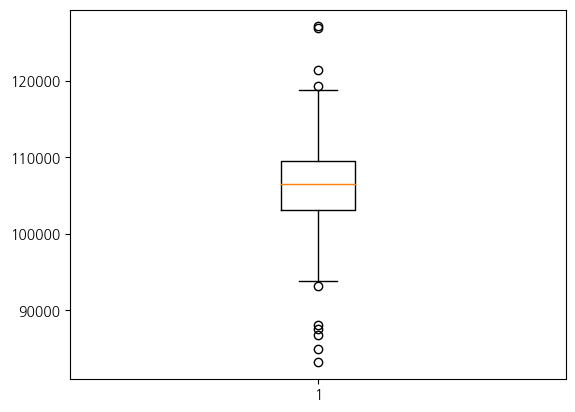

In [ ]:
plt.boxplot(df_stations[df_stations['역명']=='잠실']['승차총승객수'])
plt.show()

In [ ]:
df_stations = df_stations.groupby(['역명'])['승차총승객수'].sum()
df_stations

,승차총승객수
역명,
4.19민주묘지,5.934420e+05
가능,1.330835e+06
가락시장,3.246727e+06
가산디지털단지,1.011132e+07
가양,3.778637e+06
...,...
회기,5.497082e+06
회룡,2.454454e+06
회현,6.224887e+06


In [ ]:
df_stations = df_stations.sort_values(ascending=False)

In [ ]:
station_top10 = df_stations[:10]
station_top10

,승차총승객수
역명,
잠실,1.926806e+07
강남,1.849167e+07
고속터미널,1.763603e+07
서울역,1.756928e+07
홍대입구,1.737717e+07
사당,1.412848e+07
신림,1.305234e+07
신도림,1.236293e+07
종로3가,1.225509e+07


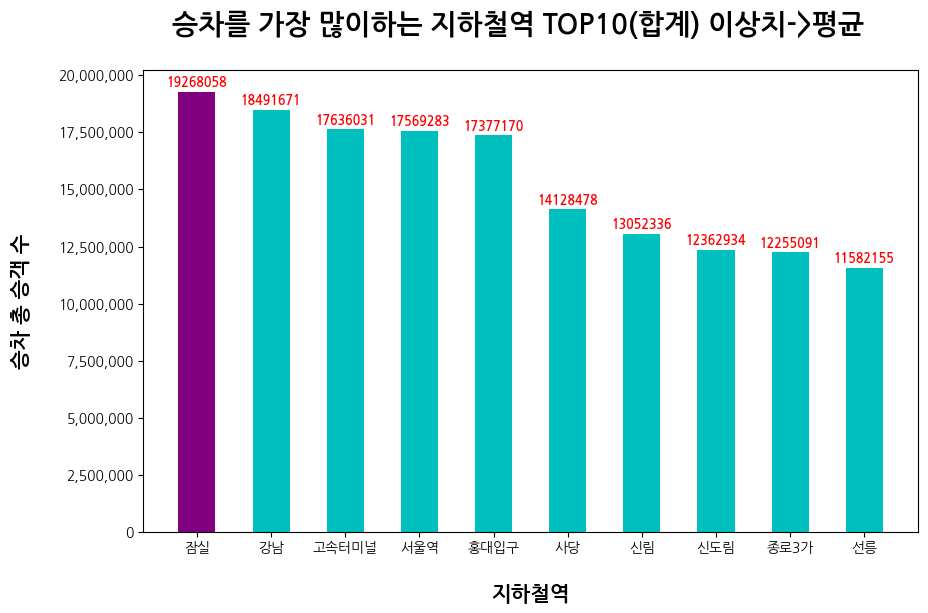

In [ ]:
colors = ['purple','c','c','c','c','c','c','c','c','c']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(station_top10.index, station_top10.values, width=0.5, color=colors)

# 막대 그래프 위에 주석 표시
for idx, val in station_top10.items():
    ax.annotate(round(val), (idx, val), xytext=(0,4), textcoords='offset points', fontsize=9, fontweight='bold', ha='center', color='red')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

ax.set_xlabel('지하철역', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)
fig.suptitle('승차를 가장 많이하는 지하철역 TOP10(합계) 이상치->평균', fontsize=20, fontweight='bold')

plt.show()

In [ ]:
print(f'승차를 가장 많이하는 지하철역: {df_stations.idxmax()} || 승차 승객 수: {int(df_stations.max())}')

승차를 가장 많이하는 지하철역: 잠실 || 승차 승객 수: 19268058


In [ ]:
# TOP10에서 지하철 역별로 승차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(station_top10.index)
test_df =  df[df['역명'].isin(date_list)].copy()

grouped = test_df.groupby('역명')

# 지하철 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 강남 - D’Agostino’s K-squared Test Statistic: 30.19247510040916, p-value: 2.7783524294926755e-07
강남: 데이터는 정규분포를 따르지 않습니다.
역명: 고속터미널 - D’Agostino’s K-squared Test Statistic: 6.111642930678956, p-value: 0.04708402698349146
고속터미널: 데이터는 정규분포를 따르지 않습니다.
역명: 사당 - D’Agostino’s K-squared Test Statistic: 48.30451426824489, p-value: 3.2419626053620407e-11
사당: 데이터는 정규분포를 따르지 않습니다.
역명: 서울역 - D’Agostino’s K-squared Test Statistic: 14.377720131243835, p-value: 0.0007549492227430457
서울역: 데이터는 정규분포를 따르지 않습니다.
역명: 선릉 - D’Agostino’s K-squared Test Statistic: 55.38852157696735, p-value: 9.387184616733535e-13
선릉: 데이터는 정규분포를 따르지 않습니다.
역명: 신도림 - D’Agostino’s K-squared Test Statistic: 60.71805246660914, p-value: 6.534952435410107e-14
신도림: 데이터는 정규분포를 따르지 않습니다.
역명: 신림 - D’Agostino’s K-squared Test Statistic: 44.49619866727903, p-value: 2.1765729450761058e-10
신림: 데이터는 정규분포를 따르지 않습니다.
역명: 잠실 - D’Agostino’s K-squared Test Statistic: 23.856342033181583, p-value: 6.601781529851091e-06
잠실: 데이터는 정규분포를 따르지 않습니다.
역명:

In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 지하철 역별로 승차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['승차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 1054.4362568029608, p-value: 3.135344042334559e-221
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
                   강남      고속터미널         사당        서울역         선릉        신도림         신림         잠실       종로3가       홍대입구
강남                1.0        1.0        0.0     1.0000     0.0000     0.0000     0.0000     1.0000     0.0000        1.0
고속터미널             1.0        1.0        0.0     1.0000     0.0000     0.0000     0.0000     1.0000     0.0000        1.0
사당                0.0        0.0        1.0     0.0000     1.0000     0.0000     1.0000     0.0000     0.0000        0.0
서울역               1.0        1.0        0.0     1.0000     0.0000     0.0000     0.0000     0.1237     0.0000        1.0
선릉                0.0        0.0        1.0     0.0000     1.0000     0.0005     1.0000     0.0000     0.0001        0.0
신도림               0.0        0.0        0.0     0.0000     0.0005     1.0000     0.0083     0.0000     1.0000        0.0
신림                0.0        0.0       

##노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(50, 60))

line_number = 1

for r in range(3):
    for c in range(3):
        df_line = df[df['노선명']==f'{line_number}호선']
        df_line = df_line.groupby(['역명', '요일'])['승차총승객수'].mean()
        df_line = df_line.reset_index()
        df_line = df_line.pivot_table(index='역명', columns='요일', values='승차총승객수')
        df_line = df_line[['월', '화', '수', '목', '금', '토', '일']]
        df_line = df_line.astype('int')
        sns.heatmap(df_line, linewidths=0.5, cmap='Blues', annot=True, fmt='d', ax=axes[r,c])
        axes[r,c].set_title(f'{line_number}호선 역별/요일별 승차승객수(합계)', fontsize=20, fontweight='bold')
        axes[r,c].set_xlabel(f'요일', fontsize=20, fontweight='bold')
        axes[r,c].set_ylabel(f'{line_number}호선 역명', fontsize=20, fontweight='bold')
        line_number += 1

fig.set_layout_engine('tight', pad=5.0, h_pad=5.0, w_pad=5.0)
fig.suptitle('지하철 역별/요일별 승차승객수(합계)', fontsize=30, fontweight='bold')
plt.plot()

Output hidden; open in https://colab.research.google.com to view.

##1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
def outlier_to_mean(df, station):
    sub_df = df[df['역명']==f'{station}']['하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
df_line1 = df[df['노선명']=='1호선']
line1_stations = df_line1['역명'].unique()
for station in line1_stations:
    df_line1.loc[df_line1['역명']==f'{station}','하차총승객수'] = outlier_to_mean(df_line1, station)

In [ ]:
df_line1 = df_line1.groupby(['역명'])['하차총승객수'].sum()

In [ ]:
df_line1

,하차총승객수
역명,
가능,1.237540e+06
가산디지털단지,1.057138e+07
간석,1.147764e+06
개봉,4.477937e+06
관악,1.525284e+06
...,...
천안,1.314103e+06
평택,2.596456e+06
화서,1.520118e+06


In [ ]:
df_line1 = df_line1.sort_values(ascending=False)
df_line1

,하차총승객수
역명,
가산디지털단지,1.057138e+07
수원,1.028348e+07
영등포,9.498106e+06
노량진,8.077743e+06
부평,7.854198e+06
...,...
서동탄,2.989771e+05
진위,2.713360e+05
봉명,2.386830e+05


In [ ]:
line1_station_top10 = df_line1[:10]

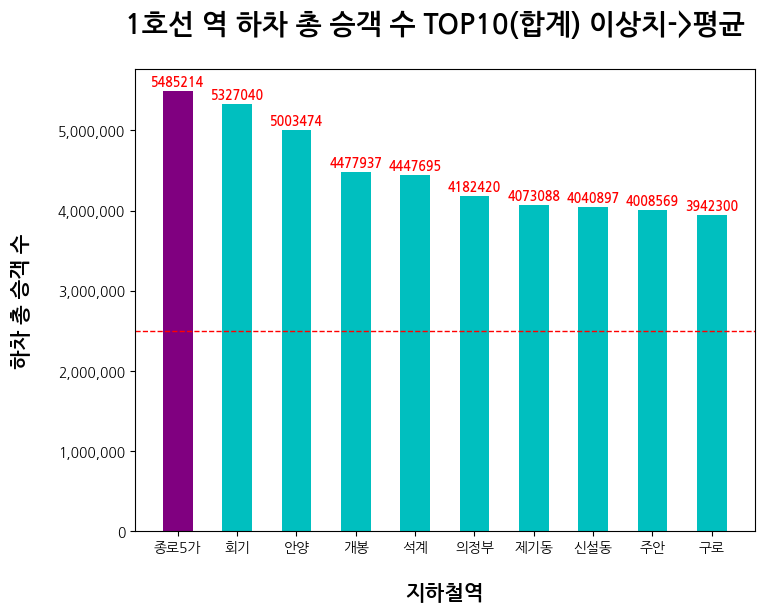

In [ ]:
colors = ['purple','c','c','c','c','c','c','c','c','c']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1_station_top10.index, line1_station_top10.values, width=0.5, color=colors)

ax.axhline(y=df_line1.mean().round(), color='r', linestyle='--', linewidth=1) # 평균을 점선으로 그림

# 막대 그래프 위 주석 표시
for idx, val in df_line1.items():
    ax.annotate(round(val), (idx, val), xytext=(0,4), textcoords='offset points',
                fontsize=9, fontweight='bold', ha='center', color='red')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

ax.set_xlabel('지하철역', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)
fig.suptitle('1호선 역 하차 총 승객 수 TOP10(합계) 이상치->평균', fontsize=20, fontweight='bold')

plt.show()

In [ ]:
print(f'1호선에서 하차를 가장 많이하는 지하철역: {df_line1.idxmax()} || 하차 승객 수: {int(df_line1.max())}')

1호선에서 하차를 가장 많이하는 지하철역: 가산디지털단지 || 하차 승객 수: 10571381


In [ ]:
# 1호선 하차총승객수 TOP10에서 역별로 하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(line1_station_top10.index)
test_df = df[df['노선명']=='1호선'].copy()
test_df = test_df[test_df['역명'].isin(date_list)]

grouped = test_df.groupby('역명')

# 1호선 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['하차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 가산디지털단지 - D’Agostino’s K-squared Test Statistic: 359.67849080675245, p-value: 7.885116089646804e-79
가산디지털단지: 데이터는 정규분포를 따르지 않습니다.
역명: 노량진 - D’Agostino’s K-squared Test Statistic: 50.67348573843671, p-value: 9.917275602279573e-12
노량진: 데이터는 정규분포를 따르지 않습니다.
역명: 부천 - D’Agostino’s K-squared Test Statistic: 41.82211789705308, p-value: 8.287861557548862e-10
부천: 데이터는 정규분포를 따르지 않습니다.
역명: 부평 - D’Agostino’s K-squared Test Statistic: 25.007194178235057, p-value: 3.7132721493024265e-06
부평: 데이터는 정규분포를 따르지 않습니다.
역명: 송내 - D’Agostino’s K-squared Test Statistic: 25.602131227889846, p-value: 2.757832221203342e-06
송내: 데이터는 정규분포를 따르지 않습니다.
역명: 수원 - D’Agostino’s K-squared Test Statistic: 3.6913030574021284, p-value: 0.15792239639036693
수원: 데이터는 정규분포를 따릅니다.
역명: 역곡 - D’Agostino’s K-squared Test Statistic: 21.780201693687925, p-value: 1.8641862263744072e-05
역곡: 데이터는 정규분포를 따르지 않습니다.
역명: 영등포 - D’Agostino’s K-squared Test Statistic: 8.789009565798516, p-value: 0.012344992263214838
영등포: 데이터는 정규분포를 따르지 않습니다.
역명

In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

#  1호선 역별로 하차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='하차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 869.6725908021741, p-value: 2.113459983628085e-181
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
              가산디지털단지        노량진         부천         부평         송내         수원         역곡        영등포         용산         종각
가산디지털단지        1.0000        0.0     0.0000     0.0000        0.0        0.0        0.0     0.2753        0.0     0.0000
노량진            0.0000        1.0     1.0000     1.0000        0.0        0.0        0.0     0.0000        1.0     1.0000
부천             0.0000        1.0     1.0000     1.0000        0.0        0.0        0.0     0.0000        1.0     0.1854
부평             0.0000        1.0     1.0000     1.0000        0.0        0.0        0.0     0.0000        1.0     0.6995
송내             0.0000        0.0     0.0000     0.0000        1.0        0.0        1.0     0.0000        0.0     0.0000
수원             0.0000        0.0     0.0000     0.0000        0.0        1.0        0.0     1.0000        0.0     0.0000
역곡             0.0000        0.0     0.0

##2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [ ]:
subway_location_df = pd.read_csv('rawfiles/지하철노선위경도정보2.csv')
subway_location_df.head()

,역이름,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481285,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선


In [ ]:
subway_lon_lat_df = df.merge(subway_location_df, left_on=['역명', '노선명'], right_on=['역이름', '호선'])
subway_lon_lat_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01,가능,수도권,37.748393,127.044275,1호선
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01,가산디지털단지,수도권,37.480389,126.882644,1호선
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01,간석,수도권,37.464696,126.693513,1호선
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01,개봉,수도권,37.494634,126.858693,1호선
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01,관악,수도권,37.419557,126.908496,1호선


In [ ]:
line2_info = subway_lon_lat_df[subway_lon_lat_df['노선명']=='2호선']
line2_info.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
89,2019-01-01,화,2호선,강남,38729.0,36544.0,75273.0,2019-01,01-01,강남,수도권,37.498085,127.027978,2호선
90,2019-01-01,화,2호선,강변,29375.0,27265.0,56640.0,2019-01,01-01,강변,수도권,37.535118,127.094723,2호선
91,2019-01-01,화,2호선,건대입구,38542.0,39275.0,77817.0,2019-01,01-01,건대입구,수도권,37.540398,127.069203,2호선
92,2019-01-01,화,2호선,교대,12027.0,11552.0,23579.0,2019-01,01-01,교대,수도권,37.492736,127.013863,2호선
93,2019-01-01,화,2호선,구로디지털단지,24511.0,25162.0,49673.0,2019-01,01-01,구로디지털단지,수도권,37.485253,126.901473,2호선


In [ ]:
line2_lon_lat = line2_info[['사용일자', '역이름', '역지역', '위도', '경도', '호선', '승차총승객수']]
line2_lon_lat.head()

,사용일자,역이름,역지역,위도,경도,호선,승차총승객수
89,2019-01-01,강남,수도권,37.498085,127.027978,2호선,38729.0
90,2019-01-01,강변,수도권,37.535118,127.094723,2호선,29375.0
91,2019-01-01,건대입구,수도권,37.540398,127.069203,2호선,38542.0
92,2019-01-01,교대,수도권,37.492736,127.013863,2호선,12027.0
93,2019-01-01,구로디지털단지,수도권,37.485253,126.901473,2호선,24511.0


In [ ]:
def outlier_to_mean(df, station):
    sub_df = df[df['역이름']==f'{station}']['승차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [ ]:
line2_stations = line2_lon_lat['역이름'].unique()
for station in line2_stations:
    line2_lon_lat.loc[line2_lon_lat['역이름']==f'{station}','승차총승객수'] = outlier_to_mean(line2_lon_lat, station)

In [ ]:
line2_lon_lat.max()

,0
사용일자,2019-06-30 00:00:00
역이름,홍대입구
역지역,수도권
위도,37.574055
경도,127.1038
호선,2호선
승차총승객수,132727.0


In [ ]:
line2_lon_lat = line2_lon_lat.groupby(['역이름', '역지역', '위도', '경도', '호선'])['승차총승객수'].sum()
line2_lon_lat = line2_lon_lat.reset_index().sort_values(by='승차총승객수', ascending=False)
line2_lon_lat.head()

,역이름,역지역,위도,경도,호선,승차총승객수
39,잠실,수도권,37.513309,127.100215,2호선,1.926806e+07
0,강남,수도권,37.498085,127.027978,2호선,1.849167e+07
46,홍대입구,수도권,37.556864,126.923765,2호선,1.737717e+07
15,사당,수도권,37.476553,126.981549,2호선,1.412848e+07
27,신림,수도권,37.484264,126.929741,2호선,1.305234e+07


In [ ]:
line2_lon_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 39 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     47 non-null     object 
 1   역지역     47 non-null     object 
 2   위도      47 non-null     float64
 3   경도      47 non-null     float64
 4   호선      47 non-null     object 
 5   승차총승객수  47 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

max_value = line2_lon_lat['승차총승객수'].max()

m = folium.Map(location=[37.5350, 126.9780], zoom_start=12)

for idx, row in line2_lon_lat.iterrows():
    if row['승차총승객수'] == max_value:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {round(row['승차총승객수'])}",
                  tooltip=row['역이름'] ,icon=folium.Icon(icon='star', color='orange')).add_to(m)
    else:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {round(row['승차총승객수'])}",
                    tooltip=row['역이름'] ,icon=folium.Icon(icon='star')).add_to(m)

HeatMap(line2_lon_lat[['위도', '경도', '승차총승객수']], radius=25, min_opacity=0.7).add_to(m)

m

In [ ]:
line2_lon_lat['역이름'].head(10)

,역이름
39,잠실
0,강남
46,홍대입구
15,사당
27,신림
26,신도림
20,선릉
2,건대입구
4,구로디지털단지
16,삼성


In [ ]:
# 2호선 역별로 승차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(line2_lon_lat['역이름'].head(10))  # top10만 추출
test_df = df[df['노선명']=='2호선'].copy()
test_df = test_df[test_df['역명'].isin(date_list)]

grouped = test_df.groupby('역명')

# 2호선 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 강남 - D’Agostino’s K-squared Test Statistic: 30.19247510040916, p-value: 2.7783524294926755e-07
강남: 데이터는 정규분포를 따르지 않습니다.
역명: 건대입구 - D’Agostino’s K-squared Test Statistic: 73.89841208699917, p-value: 8.97767138463438e-17
건대입구: 데이터는 정규분포를 따르지 않습니다.
역명: 구로디지털단지 - D’Agostino’s K-squared Test Statistic: 35.29186045753534, p-value: 2.1700506649535968e-08
구로디지털단지: 데이터는 정규분포를 따르지 않습니다.
역명: 사당 - D’Agostino’s K-squared Test Statistic: 48.30451426824489, p-value: 3.2419626053620407e-11
사당: 데이터는 정규분포를 따르지 않습니다.
역명: 삼성 - D’Agostino’s K-squared Test Statistic: 21.64004239443357, p-value: 1.999514233388848e-05
삼성: 데이터는 정규분포를 따르지 않습니다.
역명: 선릉 - D’Agostino’s K-squared Test Statistic: 55.38852157696735, p-value: 9.387184616733535e-13
선릉: 데이터는 정규분포를 따르지 않습니다.
역명: 신도림 - D’Agostino’s K-squared Test Statistic: 60.71805246660914, p-value: 6.534952435410107e-14
신도림: 데이터는 정규분포를 따르지 않습니다.
역명: 신림 - D’Agostino’s K-squared Test Statistic: 44.49619866727903, p-value: 2.1765729450761058e-10
신림: 데이터는 정규분포를 따르지 않습니

In [ ]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 2호선 역별로 승차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['승차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 964.5214848492294, p-value: 7.688116131712186e-202
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
                   강남       건대입구    구로디지털단지         사당         삼성         선릉        신도림         신림         잠실       홍대입구
강남                1.0     0.0000     0.0000        0.0      0.000     0.0000        0.0     0.0000        1.0        1.0
건대입구              0.0     1.0000     0.0332        0.0      1.000     0.0000        1.0     0.0000        0.0        0.0
구로디지털단지           0.0     0.0332     1.0000        0.0      0.084     0.0309        1.0     0.0365        0.0        0.0
사당                0.0     0.0000     0.0000        1.0      0.000     1.0000        0.0     1.0000        0.0        0.0
삼성                0.0     1.0000     0.0840        0.0      1.000     0.0000        1.0     0.0000        0.0        0.0
선릉                0.0     0.0000     0.0309        1.0      0.000     1.0000        0.0     1.0000        0.0        0.0
신도림               0.0     1.0000     1.0

In [ ]:
passengers_of_day = df[['사용일자', '승하차총승객수']]
passengers_of_day = passengers_of_day.groupby('사용일자')['승하차총승객수'].sum()
passengers_of_day = passengers_of_day.reset_index()

passengers_df = pd.DataFrame()
passengers_df['ds'] = passengers_of_day['사용일자']
passengers_df['y'] = passengers_of_day['승하차총승객수']
passengers_df

,ds,y
0,2019-01-01,6813453.0
1,2019-01-02,15214002.0
2,2019-01-03,15716213.0
3,2019-01-04,16509281.0
4,2019-01-05,12092335.0
...,...,...
176,2019-06-26,16561790.0
177,2019-06-27,16365644.0
178,2019-06-28,17170712.0
179,2019-06-29,12601537.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


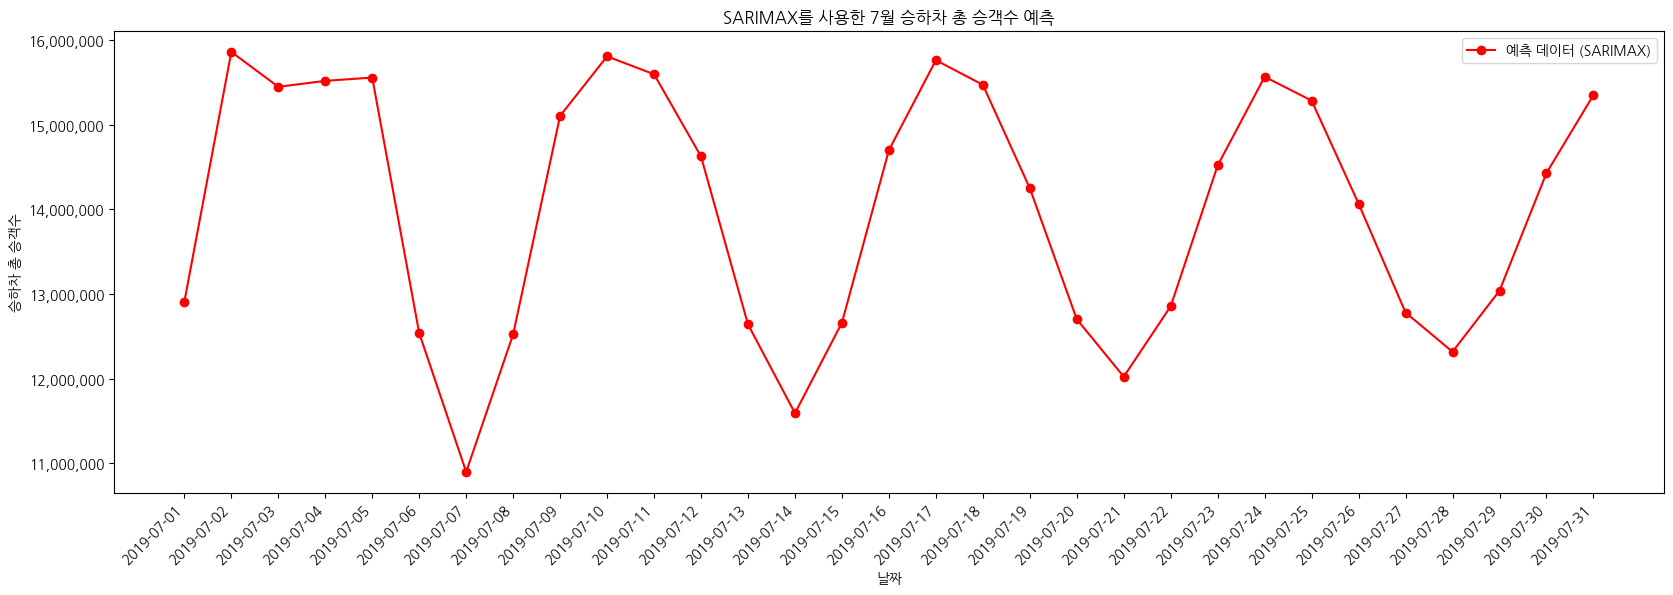

In [ ]:
# 그냥 gpt로 해본거. 나도 이거 잘 모름...
# 전체 코드를 pandas와 matplotlib를 사용하여 예측 데이터 출력 및 시각화
import numpy as np
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.ticker as mtick

# 1월부터 6월까지의 데이터 필터링
first_half_df = df[(df['사용일자'].dt.month >= 1) & (df['사용일자'].dt.month <= 6)]

# 일자별 승하차 총승객수 합계를 구함
daily_passengers_first_half = first_half_df.groupby('사용일자')['승하차총승객수'].sum().reset_index()


# y 데이터를 로그 변환하여 안정화 (데이터가 양수임을 가정)
daily_passengers_first_half['log_y'] = np.log(daily_passengers_first_half['승하차총승객수'])

# SARIMAX 모델을 사용하여 예측 수행
# 로그 변환한 데이터를 사용하여 안정화된 시계열 데이터로 모델 생성
model = SARIMAX(daily_passengers_first_half['log_y'], order=(5, 1, 2))

# 모델 학습 (최적화 알고리즘과 반복 횟수 조정)
try:
    sarimax_result = model.fit(disp=False, maxiter=1000, method='powell')
except Exception as e:
    print(f"최적화 과정에서 오류가 발생했습니다: {e}")

# 향후 31일 예측 (7월)
forecast_values_log = sarimax_result.forecast(steps=31)
forecast_values = np.exp(forecast_values_log)  # 로그 변환된 값을 원래 단위로 변환

# 예측된 값을 날짜와 함께 데이터프레임으로 정리
forecast_dates = pd.date_range(start=daily_passengers_first_half['사용일자'].max() + timedelta(days=1), periods=31)
july_forecast_sarimax = pd.DataFrame({'ds': forecast_dates, 'yhat': forecast_values})

# 예측된 데이터를 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(july_forecast_sarimax['ds'], july_forecast_sarimax['yhat'], 'ro-', label='예측 데이터 (SARIMAX)')

# x축에 모든 날짜 표시 (날짜 형식 설정)
ax.set_xticks(july_forecast_sarimax['ds'])
ax.set_xticklabels(july_forecast_sarimax['ds'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

# y축 숫자 형식을 그대로 유지
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.set_title('SARIMAX를 사용한 7월 승하차 총 승객수 예측')
ax.set_xlabel('날짜')
ax.set_ylabel('승하차 총 승객수')
ax.legend()

plt.show()